<a href="https://colab.research.google.com/github/abhi1ranjan/ML-For-Beginners/blob/main/House%20Pricing%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Data Extraction

In [4]:
HouseDF = pd.read_csv('/content/train.csv')

In [5]:
HouseDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We are trying to predict the sale Price

## EDA

In [7]:
HouseDF.shape

(1460, 81)

In [8]:
HouseDF.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


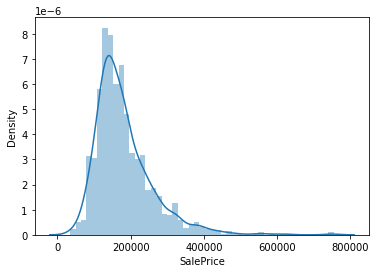

In [9]:
sns.distplot(HouseDF['SalePrice'])

Distribution is skewed.

In [10]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# see correlation on numeric features

NumericFeatures = HouseDF.dtypes[HouseDF.dtypes != 'object'].index

In [15]:
NumericFeatures

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

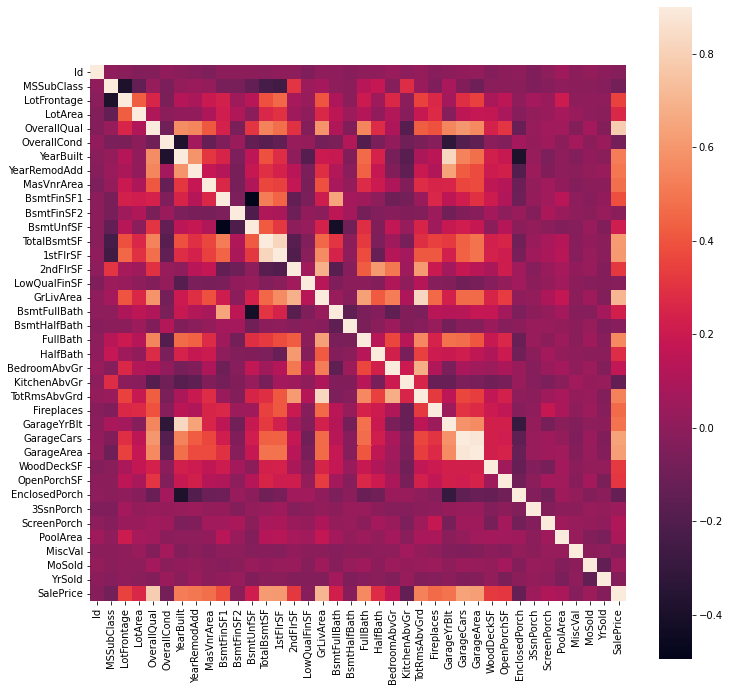

In [17]:
CorrelationMat = HouseDF[NumericFeatures].corr()

#plot heatmat of the correlation Matrix

plt.subplots(figsize=(12,12))
sns.heatmap(CorrelationMat, square = True, vmax = 0.9)

Diagonal lines are same features. So, they have 1 correlation. Light color means better correlation. The lighter the color, the better the correlation they have. If the correlation is negative, it will get darker. So darker the color, the correlation is negative. For e.g. in case of sale price, "Overall quality" has light color. so it has strong correlation with sale price.


If there are 2 strong correlated features, we can remove one of it, there is no point of having 2 similar feature information.

## Feature Engineering

In [18]:
#handling categorical Variables

HouseDF = pd.get_dummies(HouseDF, drop_first=True)

In [19]:
HouseDF.shape

(1460, 247)

In [22]:
HouseDF.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [23]:
# handling missing values

HouseDF = HouseDF.fillna(HouseDF.mean())

In [24]:
HouseDF.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


## Target Enginnering

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67d1497450>,
      dtype=object)

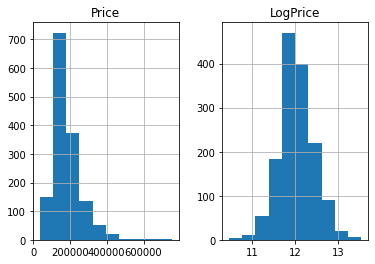

In [26]:
## I have transformed the log of the salePrice to change the distribution from skewed to normal

Price = pd.DataFrame({'Price': HouseDF['SalePrice'], 'LogPrice': np.log1p(HouseDF['SalePrice'])})
Price.hist()

In [28]:
## Earlier saleprice was flat to the left side, now it's more evenly distributed
HouseDF['SalePrice'] = np.log1p(HouseDF['SalePrice'])

# Modelling

Error needs to be less than 0.15

In [30]:
HouseDF = HouseDF.set_index('Id')

# split features and target values
X = HouseDF.drop('SalePrice', axis = 1)
y = HouseDF['SalePrice']

In [31]:
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.model_selection import cross_val_score

In [32]:
def RMSE_CV(model):
  return np.sqrt(-cross_val_score(model, X,y, scoring = 'neg_mean_squared_error', cv = 5))

In [33]:
# Model 1: Linear Regression

LinearRegModel = LinearRegression()
RMSE_CV(LinearRegModel).mean()

0.01426609242831967

In [36]:
# Model 2: Ridge Regression

RidgeRegModel = RidgeCV(alphas = [1, 0.1, 0.01, 0.0005])
RMSE_CV(RidgeRegModel).mean()

0.01133928746855114

In [37]:
# Model 3: Lasso Regression

LassoRegModel = LassoCV(alphas = [1, 0.1, 0.01, 0.0005])
RMSE_CV(LassoRegModel).mean()

0.012135913341291915

Ridge Resgression model had the best result with the lowest RMSE. We will use that for testing.

## Check Feature Importance

In [38]:
coefficient = pd.Series(RidgeRegModel.fit(X,y).coef_, index = X.columns)

In [41]:
ImpCoefficient = pd.concat([coefficient.sort_values().head(10), 
                           coefficient.sort_values().tail(10)])

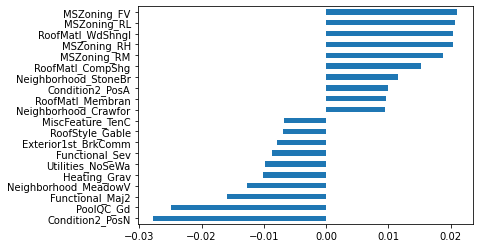

In [42]:
ImpCoefficient.plot(kind = 'barh')

Using the above graph, we can say which features are important for house prediction and if someone is looking to buy any house what are the features they should look for.

-> After developing the model, we need to make it productionize. To be able to productionize, we need to save the developed model into binary file or usually pickle file.

In [43]:
import pickle 
RidgeRegModel.fit(X,y)
pickle.dump(RidgeRegModel, open('model.pkl', 'wb'))